🏦 Banking Customer Churn - Exploratory Data Analysis
📊 Loaded 10000 customers and 50000 transactions
📈 OVERALL DATASET STATISTICS
Total Customers: 10,000
Churned Customers: 2,673
Overall Churn Rate: 26.73%

📊 Key Metrics by Churn Status:
       credit_score    age  balance  estimated_salary  tenure  \
churn                                                           
0            659.87  48.44  5051.32          39377.81    2.64   
1            617.08  48.47  4785.98          38590.92    2.30   

       products_number  txn_count  
churn                              
0                 2.61       4.99  
1                 2.27       5.04  


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


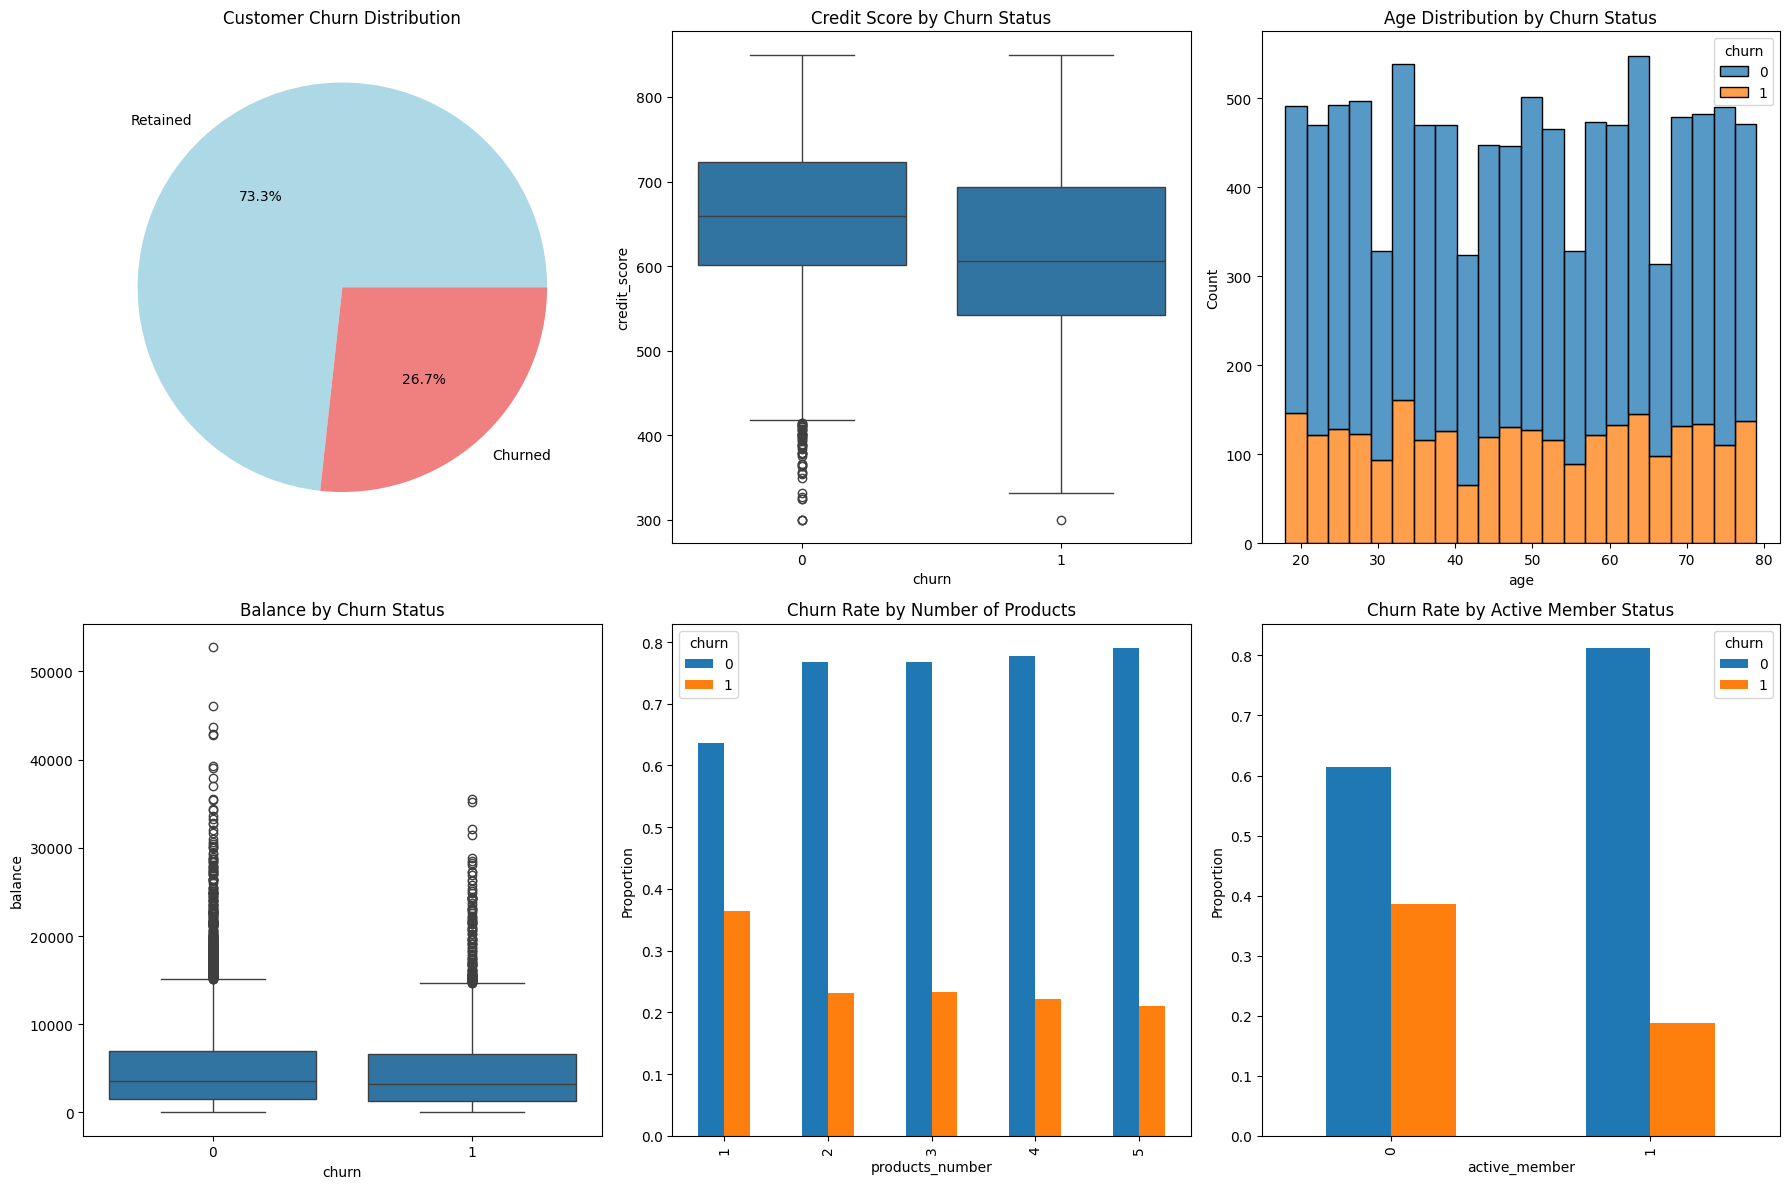

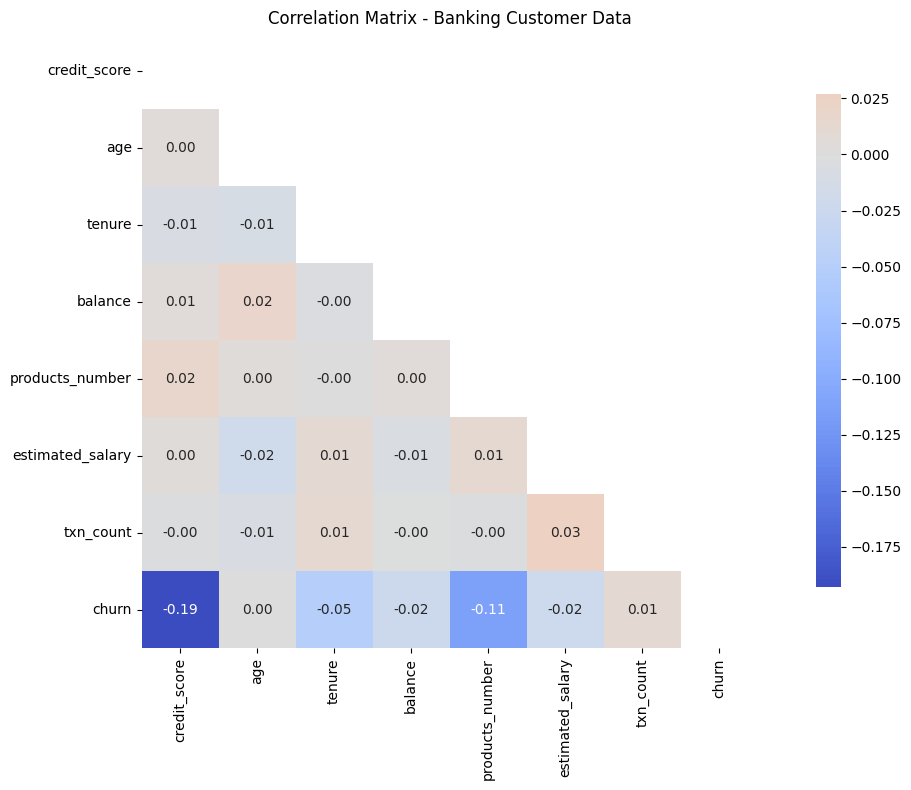

🔍 Key Correlation Insights:
Churn vs Credit Score: -0.193
Churn vs Balance: -0.023
Churn vs Active Member: -0.113


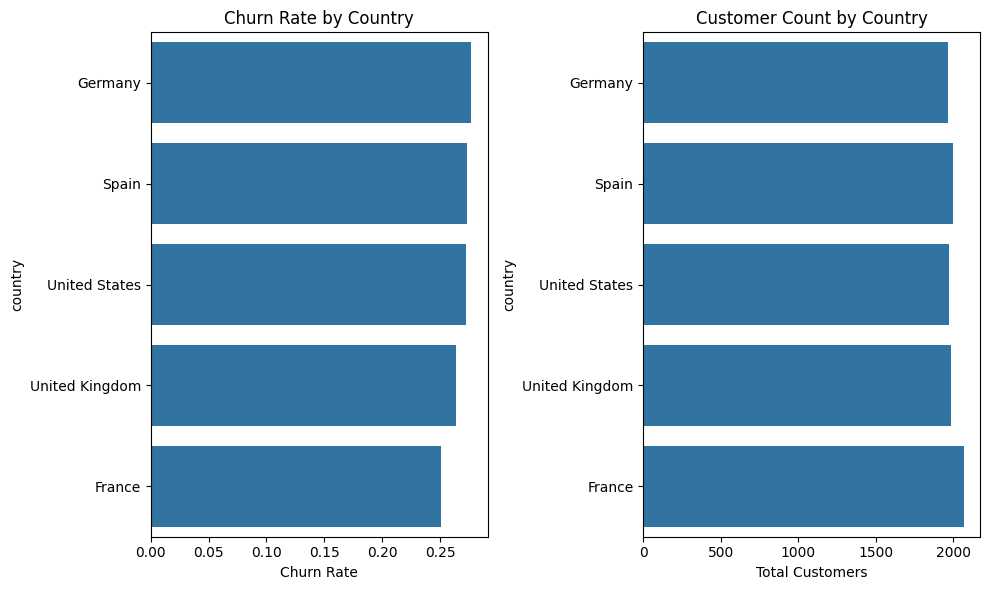

🌍 Churn Rates by Country:
                total_customers  churn_rate
country                                    
Germany                    1968       0.277
Spain                      2001       0.273
United States              1976       0.272
United Kingdom             1985       0.264
France                     2070       0.251
💳 TRANSACTION ANALYSIS
Transaction Patterns by Churn Status:
       txn_count  avg_amount  std_amount most_common_type
churn                                                    
0          36536       12.49      179.69       Withdrawal
1          13464       14.14      194.64          Payment

Fraudulent Transaction Rate by Churn: 0.0197
🎯 KEY BUSINESS INSIGHTS
• Churned customers have 42.8 points lower credit score on average
• Churned customers have $265.34 lower average balance
• Customers with 1 product(s) have the highest churn rate
• Inactive members are -19.8% more likely to churn

📊 Overall Churn Rate: 26.73%
💰 Potential Revenue at Risk: $103,153,522.

In [1]:
# Banking Project - Exploratory Data Analysis

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings("ignore")

# Setup
import sys

# Add shared modules to path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
from shared.utils.helpers import VisualizationHelper

VisualizationHelper.setup_plotting()

print("🏦 Banking Customer Churn - Exploratory Data Analysis")
print("=" * 60)

# Load cleaned data
customers = pd.read_csv("../../data/processed/banking_customers_clean.csv")
transactions = pd.read_csv("../../data/processed/banking_transactions_clean.csv")

print(f"📊 Loaded {len(customers)} customers and {len(transactions)} transactions")

# Overall statistics
print("📈 OVERALL DATASET STATISTICS")
print("=" * 40)

total_customers = len(customers)
churned_customers = customers["churn"].sum()
churn_rate = churned_customers / total_customers

print(f"Total Customers: {total_customers:,}")
print(f"Churned Customers: {churned_customers:,}")
print(f"Overall Churn Rate: {churn_rate:.2%}")

# Key metrics by churn status
churn_summary = (
    customers.groupby("churn")
    .agg(
        {
            "credit_score": "mean",
            "age": "mean",
            "balance": "mean",
            "estimated_salary": "mean",
            "tenure": "mean",
            "products_number": "mean",
            "txn_count": "mean",
        }
    )
    .round(2)
)

print("\n📊 Key Metrics by Churn Status:")
print(churn_summary)

# 1. Churn Distribution
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Churn count
churn_counts = customers["churn"].value_counts()
axes[0, 0].pie(
    churn_counts.values,
    labels=["Retained", "Churned"],
    autopct="%1.1f%%",
    colors=["lightblue", "lightcoral"],
)
axes[0, 0].set_title("Customer Churn Distribution")

# Credit Score distribution by churn
sns.boxplot(data=customers, x="churn", y="credit_score", ax=axes[0, 1])
axes[0, 1].set_title("Credit Score by Churn Status")

# Age distribution by churn
sns.histplot(data=customers, x="age", hue="churn", multiple="stack", ax=axes[0, 2])
axes[0, 2].set_title("Age Distribution by Churn Status")

# Balance by churn
sns.boxplot(data=customers, x="churn", y="balance", ax=axes[1, 0])
axes[1, 0].set_title("Balance by Churn Status")

# Products number by churn
products_churn = pd.crosstab(
    customers["products_number"], customers["churn"], normalize="index"
)
products_churn.plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Churn Rate by Number of Products")
axes[1, 1].set_ylabel("Proportion")

# Active member by churn
active_churn = pd.crosstab(
    customers["active_member"], customers["churn"], normalize="index"
)
active_churn.plot(kind="bar", ax=axes[1, 2])
axes[1, 2].set_title("Churn Rate by Active Member Status")
axes[1, 2].set_ylabel("Proportion")

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))

# Select numerical columns for correlation
numerical_cols = [
    "credit_score",
    "age",
    "tenure",
    "balance",
    "products_number",
    "estimated_salary",
    "txn_count",
    "churn",
]
correlation_matrix = customers[numerical_cols].corr()

# Create heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8},
)
plt.title("Correlation Matrix - Banking Customer Data")
plt.tight_layout()
plt.show()

print("🔍 Key Correlation Insights:")
print(f"Churn vs Credit Score: {correlation_matrix.loc['churn', 'credit_score']:.3f}")
print(f"Churn vs Balance: {correlation_matrix.loc['churn', 'balance']:.3f}")
print(
    f"Churn vs Active Member: {correlation_matrix.loc['churn', 'products_number']:.3f}"
)

# Churn by country
plt.figure(figsize=(10, 6))
country_churn = customers.groupby("country").agg({"churn": ["count", "mean"]}).round(3)
country_churn.columns = ["total_customers", "churn_rate"]
country_churn = country_churn.sort_values("churn_rate", ascending=False)

plt.subplot(1, 2, 1)
sns.barplot(data=country_churn.reset_index(), x="churn_rate", y="country")
plt.title("Churn Rate by Country")
plt.xlabel("Churn Rate")

plt.subplot(1, 2, 2)
sns.barplot(data=country_churn.reset_index(), x="total_customers", y="country")
plt.title("Customer Count by Country")
plt.xlabel("Total Customers")

plt.tight_layout()
plt.show()

print("🌍 Churn Rates by Country:")
print(country_churn)

# Transaction patterns by churn status
print("💳 TRANSACTION ANALYSIS")
print("=" * 40)

# Merge transaction data with customer churn status
customer_txns = transactions.merge(
    customers[["customer_id", "churn"]], on="customer_id"
)

# Transaction patterns by churn
txn_analysis = (
    customer_txns.groupby("churn")
    .agg(
        {
            "amount": ["count", "mean", "std"],
            "transaction_type": lambda x: x.mode()[0] if len(x.mode()) > 0 else "N/A",
        }
    )
    .round(2)
)

txn_analysis.columns = ["txn_count", "avg_amount", "std_amount", "most_common_type"]
print("Transaction Patterns by Churn Status:")
print(txn_analysis)

# Fraud analysis
fraud_analysis = customer_txns.groupby("churn").agg({"is_fraudulent": "mean"}).round(4)
print(f"\nFraudulent Transaction Rate by Churn: {fraud_analysis.iloc[1,0]:.4f}")

print("🎯 KEY BUSINESS INSIGHTS")
print("=" * 50)

insights = []

# Insight 1: Credit Score Impact
credit_impact = customers.groupby("churn")["credit_score"].mean().diff().iloc[-1]
insights.append(
    f"• Churned customers have {abs(credit_impact):.1f} points lower credit score on average"
)

# Insight 2: Balance Impact
balance_impact = customers.groupby("churn")["balance"].mean().diff().iloc[-1]
insights.append(
    f"• Churned customers have ${abs(balance_impact):,.2f} lower average balance"
)

# Insight 3: Product Relationship
product_churn = customers.groupby("products_number")["churn"].mean()
max_product_churn = product_churn.idxmax()
insights.append(
    f"• Customers with {max_product_churn} product(s) have the highest churn rate"
)

# Insight 4: Active Member Impact
active_impact = customers.groupby("active_member")["churn"].mean().diff().iloc[-1]
insights.append(f"• Inactive members are {active_impact:.1%} more likely to churn")

# Print insights
for insight in insights:
    print(insight)

print(f"\n📊 Overall Churn Rate: {churn_rate:.2%}")
print(
    f"💰 Potential Revenue at Risk: ${customers[customers['churn']==1]['estimated_salary'].sum():,.2f}"
)